In [2]:
%run initFunc.ipynb
import pandas as pd
import seaborn as sns
sns.set()
sample = 8000
where = 'center'
name = 'v22' # 'V2buio'
filetoread = 'data_'+where+'_'+name+'_'+str(sample)+'.h5'
df = pd.read_hdf(filetoread, 'df')
df

,waveform,c1_int_w,c1_int_t,c1_und_t,c2_int_w,c2_int_t,c2_und_t,c3_int_w,c3_int_t,c3_und_t,c4_int_w,c4_int_t,c4_und_t
0,C1--center--v22--00000.trc,0.029354,-1.000000e+00,0,-0.019678,-1.000000e+00,0,-2.543492,-3.865251e-08,23,-0.380276,-4.192048e-08,18
1,C1--center--v22--00001.trc,-0.032405,-1.000000e+00,0,-0.009523,-1.000000e+00,0,-2.388136,-3.664412e-08,16,-1.600236,-3.841134e-08,14
2,C1--center--v22--00002.trc,0.058478,-1.000000e+00,0,-0.011212,-1.000000e+00,0,-3.353493,-5.039866e-08,9,-5.463545,-3.940951e-08,14
3,C1--center--v22--00003.trc,0.017993,-1.000000e+00,0,0.002062,-1.000000e+00,0,-2.384796,-5.164692e-08,14,-1.509317,-3.915702e-08,8
4,C1--center--v22--00004.trc,-0.035242,-1.000000e+00,0,-0.018170,-1.000000e+00,0,-2.250439,-3.764912e-08,6,-3.025111,-4.166747e-08,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,C1--center--v22--07995.trc,-0.026307,-1.000000e+00,0,-0.011448,-1.000000e+00,0,-1.679981,-5.117542e-08,12,-1.326035,-3.988615e-08,8
7996,C1--center--v22--07996.trc,0.008268,-1.000000e+00,0,-0.231052,-4.717757e-08,2,-1.687179,-6.966020e-08,13,-5.468713,-4.066206e-08,2
7997,C1--center--v22--07997.trc,-0.503273,-5.468525e-08,2,-0.252065,-4.642302e-08,2,-1.871373,-3.513878e-08,22,-2.538694,-3.790651e-08,6
7998,C1--center--v22--07998.trc,-0.565689,-5.765404e-08,2,-0.429998,-4.989207e-08,2,-1.491333,-6.066882e-08,18,-0.969935,-3.817393e-08,16


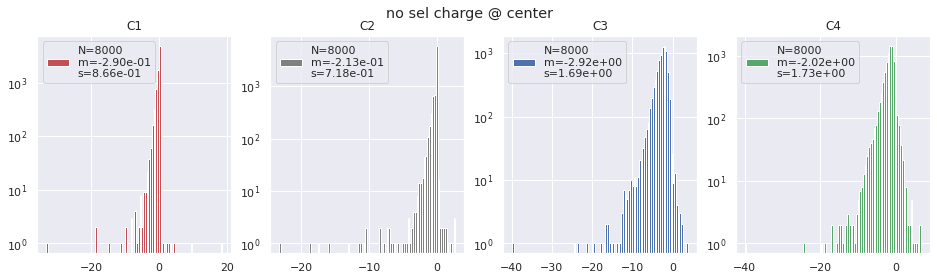

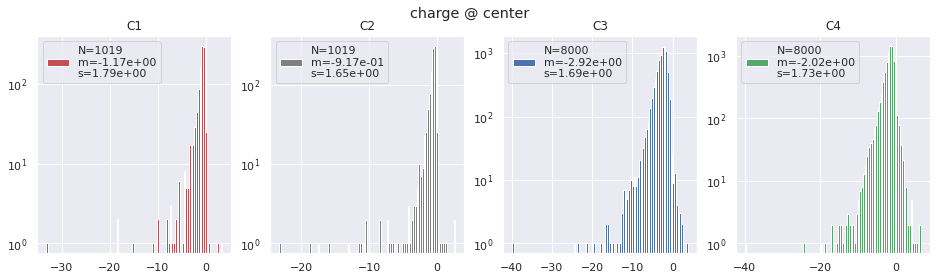

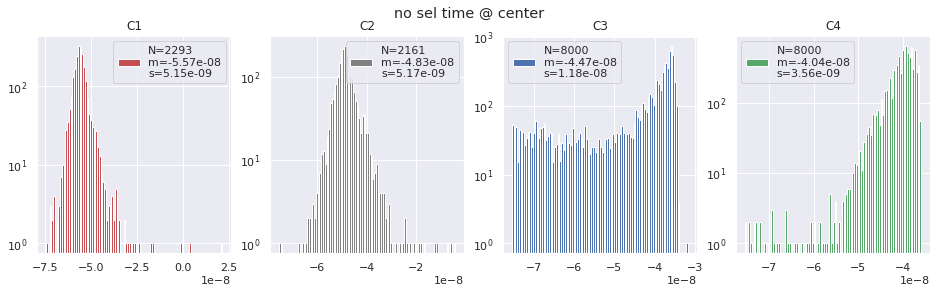

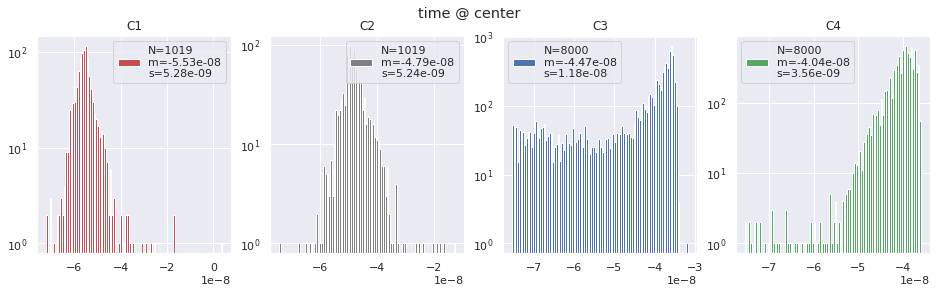

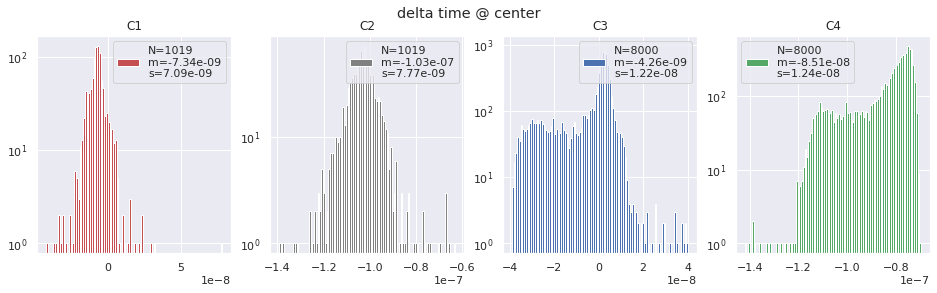

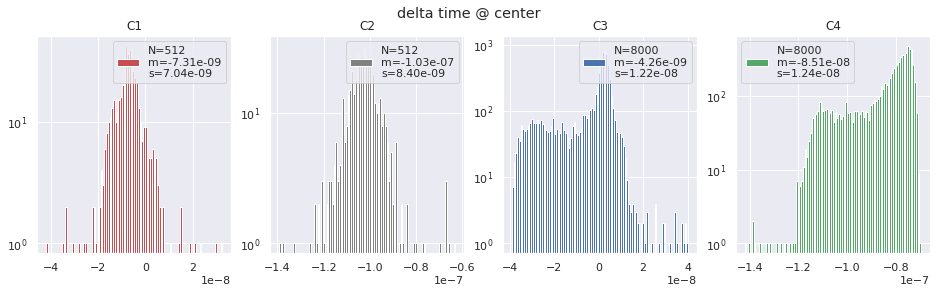

In [100]:
d1 = df['c1_int_w'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
d2 = df['c2_int_w'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
outdata(df['c1_int_w'],df['c2_int_w'],df['c3_int_w'], df['c4_int_w'], bins=100, title = 'no sel charge @ '+where)
outdata(d1,d2,df['c3_int_w'], df['c4_int_w'], bins=100, title = 'charge @ '+where)
#
pd1 = df['c3_int_t']-df['c4_int_t']
t1 = df['c1_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
t2 = df['c2_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
outdata(df['c1_int_t'][df['c1_int_t']!=-1],df['c2_int_t'][df['c2_int_t']!=-1],
        df['c3_int_t'],df['c4_int_t'], bins=100, title = 'no sel time @ '+where)
outdata(t1,t2,df['c3_int_t'],df['c4_int_t'], bins=100, title = 'time @ '+where)
outdata(t1-t2,t1+t2,df['c3_int_t']-df['c4_int_t'], 
        df['c3_int_t']+df['c4_int_t'], bins=100, title = 'delta time @ '+where)

# cut = 1.5e-08
# outdata((t1-t2)[abs(pd1)<cut],
#         (t1+t2)[abs(pd1)<cut],
#         (df['c3_int_t']-df['c4_int_t'])[abs(pd1)<cut], 
#         (df['c3_int_t']+df['c4_int_t'])[abs(pd1)<cut], bins=100, title = 'delta time with cuts_'+where)
t1c = df['c1_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1][df['c1_und_t']<3][df['c2_und_t']<3]
t2c = df['c2_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1][df['c1_und_t']<3][df['c2_und_t']<3]

outdata(t1c-t2c,t1c+t2c,df['c3_int_t']-df['c4_int_t'], 
        df['c3_int_t']+df['c4_int_t'], bins=100, title = 'delta time @ '+where)


1019 1019


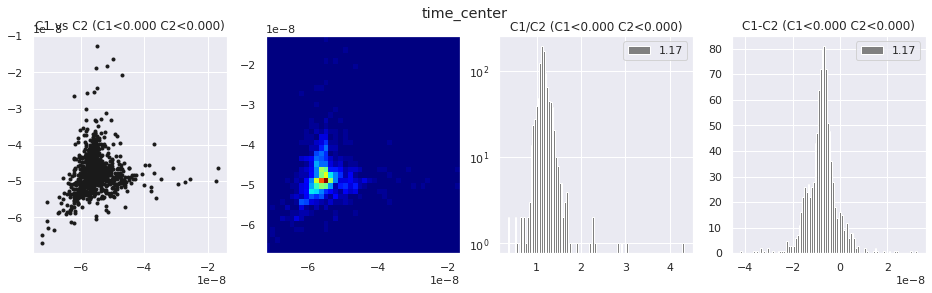

In [101]:
outdata2(t1, t2, th1=0, th2=0, bins=100, title='time_'+where)


512 512


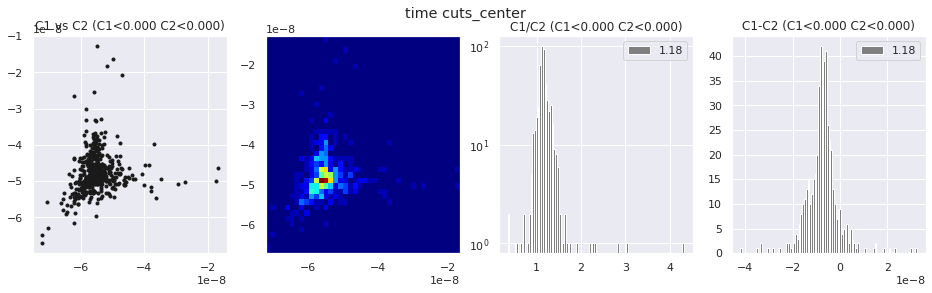

In [102]:
outdata2(t1c, t2c, th1=0, th2=0, bins=100, title='time cuts_'+where)

810 810


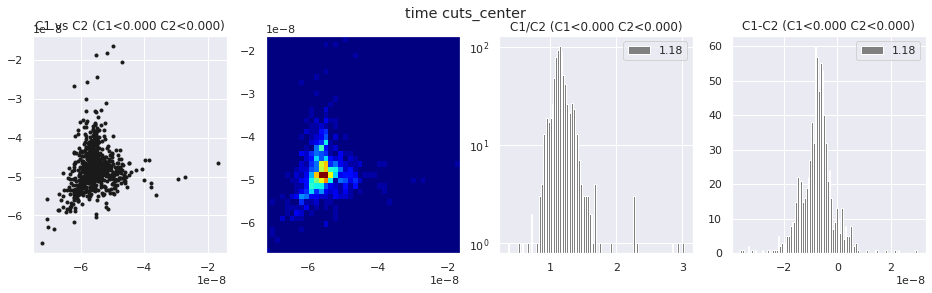

In [103]:
outdata2(t1[abs(pd1)<cut], t2[abs(pd1)<cut], th1=0, th2=0, bins=100, title='time cuts_'+where)

1019 1019


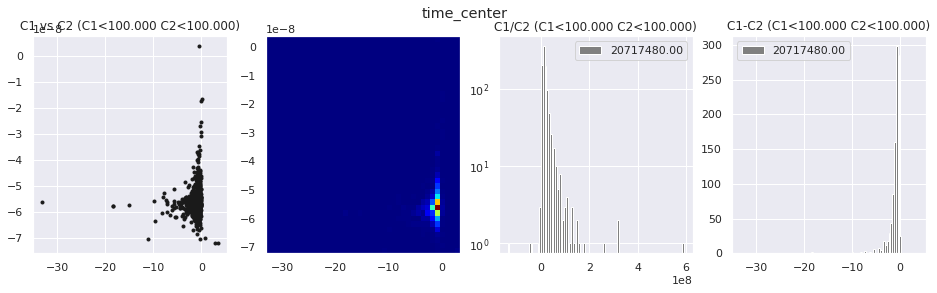

1019 1019


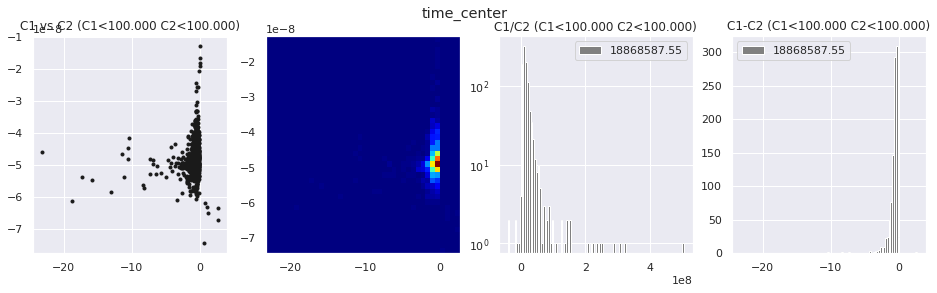

In [105]:
outdata2(d1, t1, th1=100, th2=100, bins=100, title='time_'+where)
outdata2(d2, t2, th1=100, th2=100, bins=100, title='time_'+where)

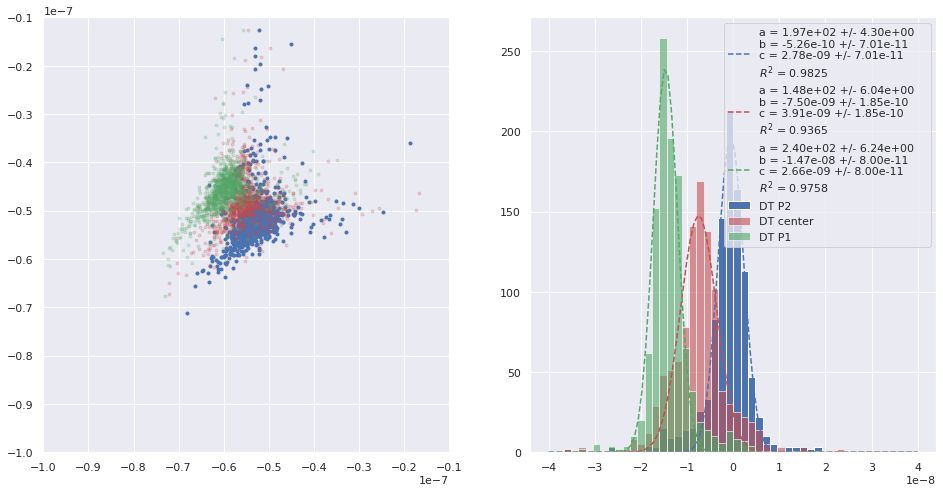

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))
df = pd.read_hdf('data_p2_v22_8000.h5', 'df')
t1 = df['c1_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
t2 = df['c2_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
ax[0].plot(t1, t2, 'b.')
histGaus(t1-t2, 50, ax[1], color='b', xrange=[-4e-08, 4e-08], alpha=1, label='DT P2')
df = pd.read_hdf('data_center_v22_8000.h5', 'df')
t1 = df['c1_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
t2 = df['c2_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
ax[0].plot(t1, t2, 'r.', alpha=0.2)
histGaus(t1-t2, 50, ax[1], color='r', xrange=[-4e-08, 4e-08], alpha=0.6, label='DT center')
df = pd.read_hdf('data_p1_v22_8000.h5', 'df')
t1 = df['c1_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
t2 = df['c2_int_t'][df['c1_int_t']!=-1][df['c2_int_t']!=-1]
ax[0].plot(t1, t2, 'g.', alpha=0.2)
histGaus(t1-t2, 50, ax[1], color='g', xrange=[-4e-08, 4e-08], alpha=0.6, label='DT P1')
ax[1].legend()
ax[0].set_xlim(-1e-07, -1e-08)
ax[0].set_ylim(-1e-07, -1e-08)
plt.show()

In [ ]:
fig = plt.subplots(1, figsize=(16, 4))
plt.plot(np.linspace(0,len(t1), len(t1)),t1, 'r.') 
plt.plot(np.linspace(0,len(t2), len(t2)),t2, 'b.') 
plt.show()

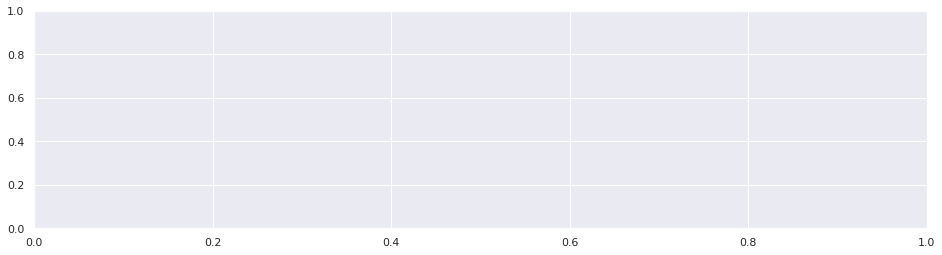

In [97]:
df[df['c1_int_t']<-4.0e-08]
fig = plt.subplots(1, figsize=(16, 4))

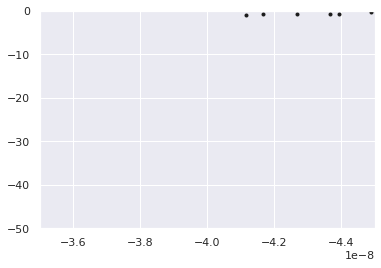

In [98]:
plt.plot(df['c1_int_t'],df['c1_int_w'], 'k.')
plt.ylim(-50, 0)
plt.xlim(-3.5e-08, -4.5e-08)
plt.show()

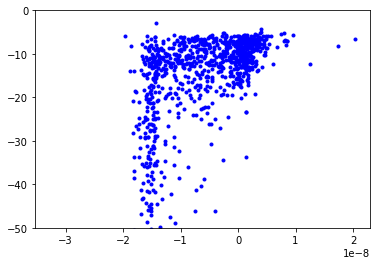

In [60]:
plt.plot(df['c1_int_t']-df['c2_int_t'], df['c1_int_w'], 'b.')
plt.ylim(-50, 0)
plt.show()

26 26


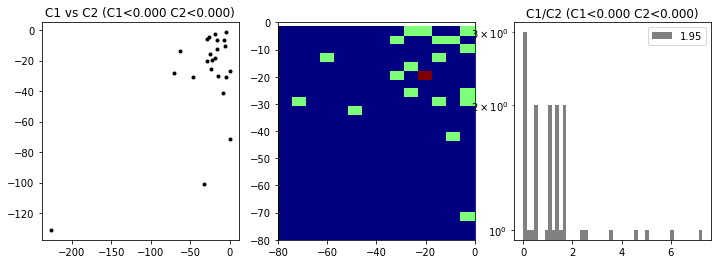

In [36]:

outdata2(df['c3_int_w'][df.c3_int_t>-1][df.c4_int_t>-1], 
         df['c4_int_w'][df.c3_int_t>-1][df.c4_int_t>-1], th1=0, th2=0)

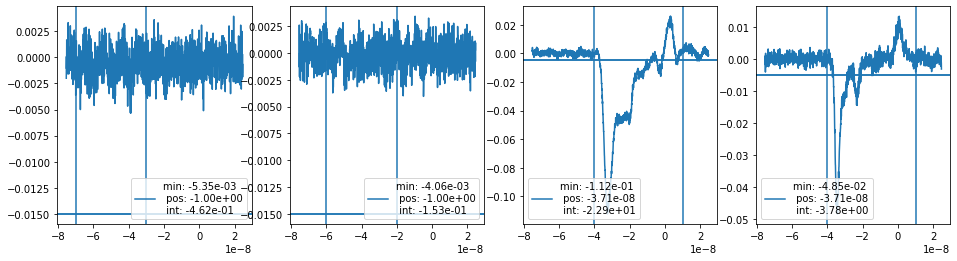

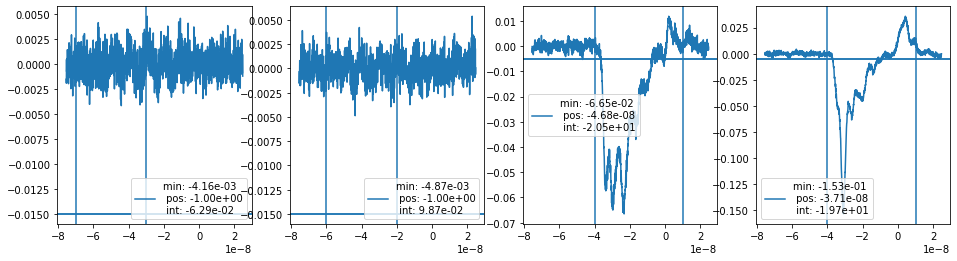

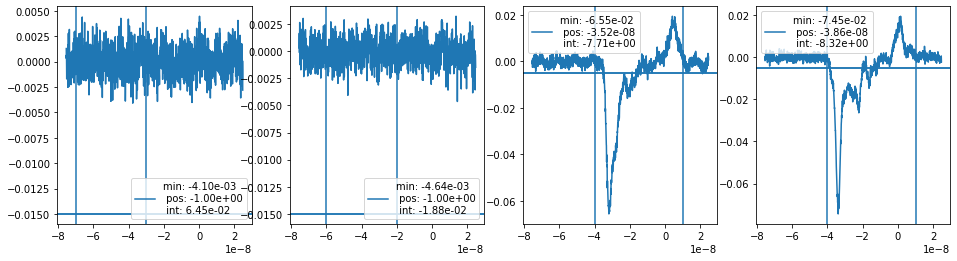

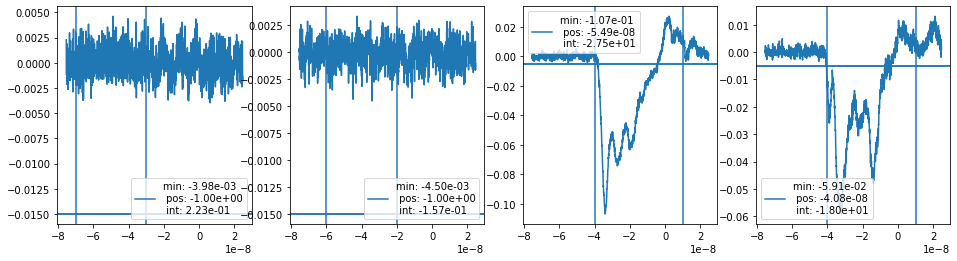

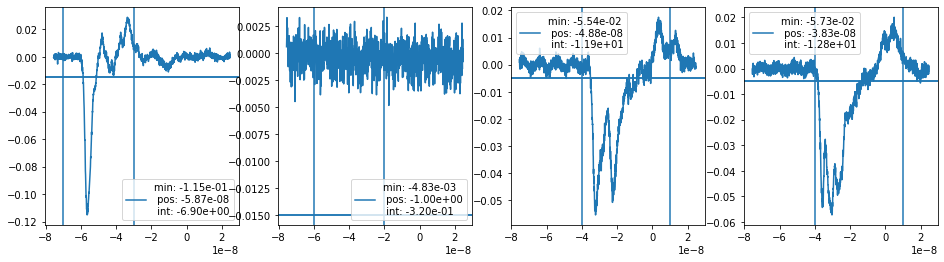

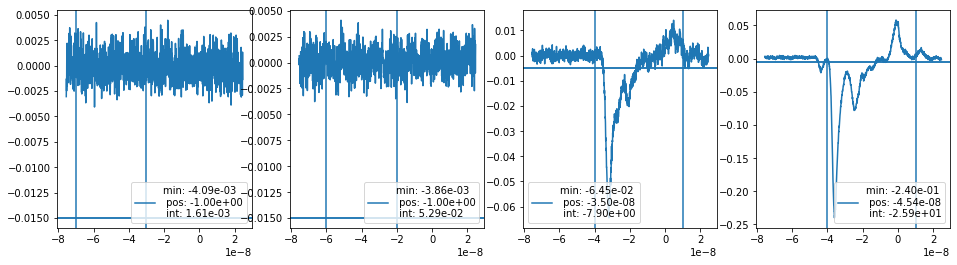

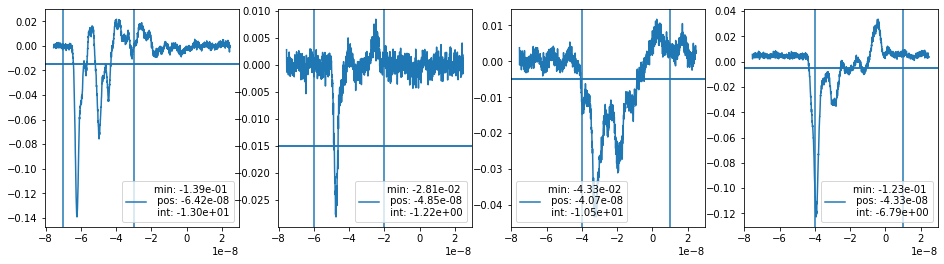

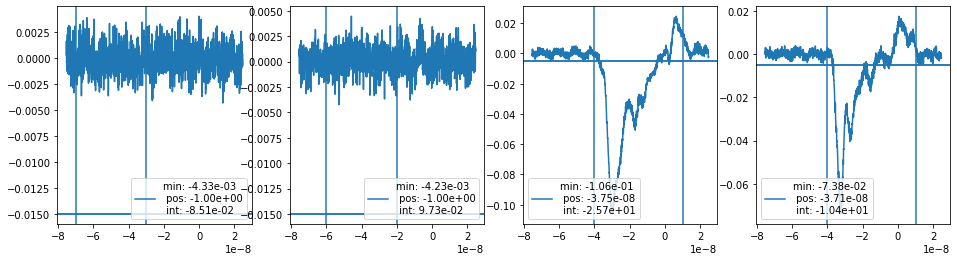

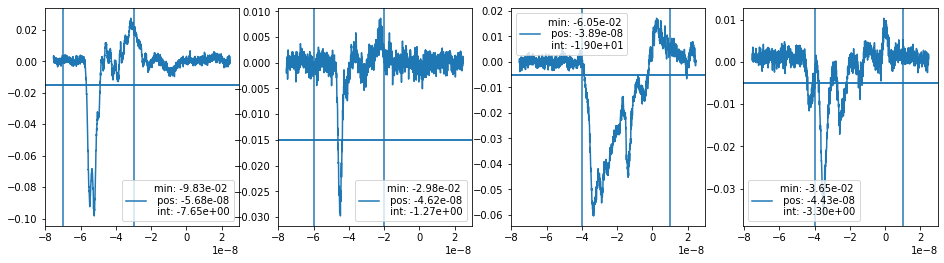

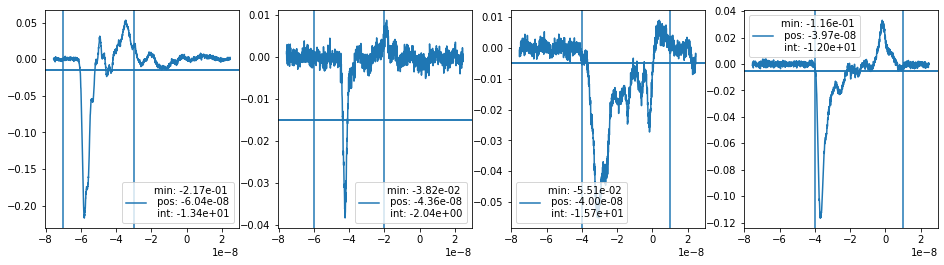

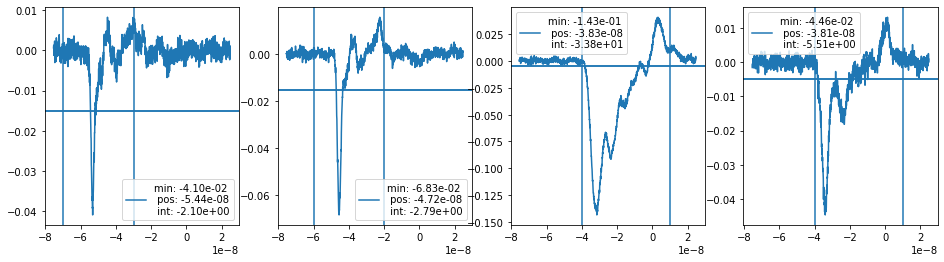

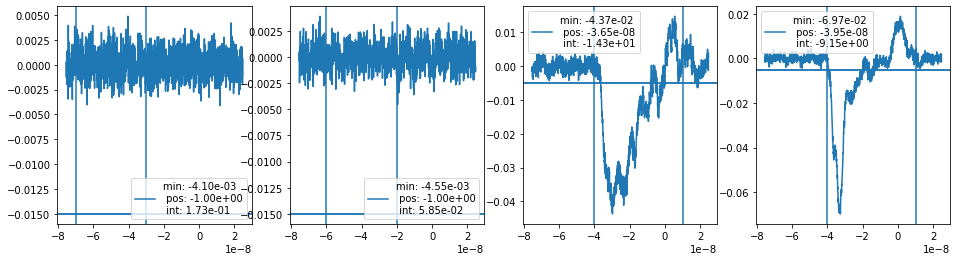

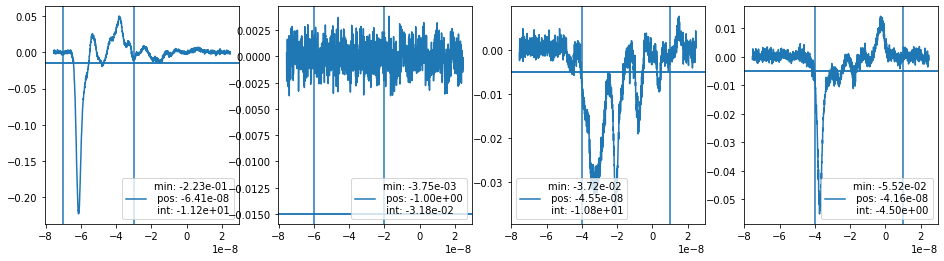

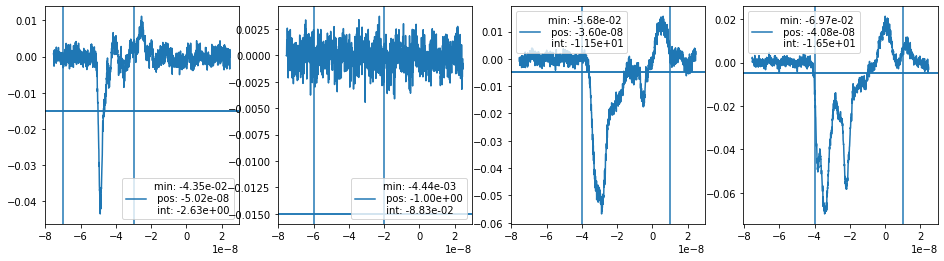

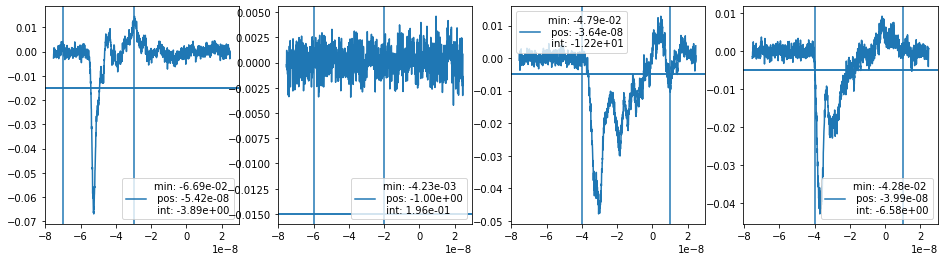

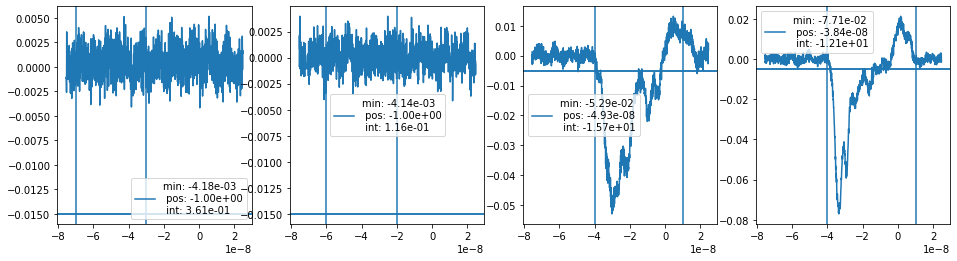

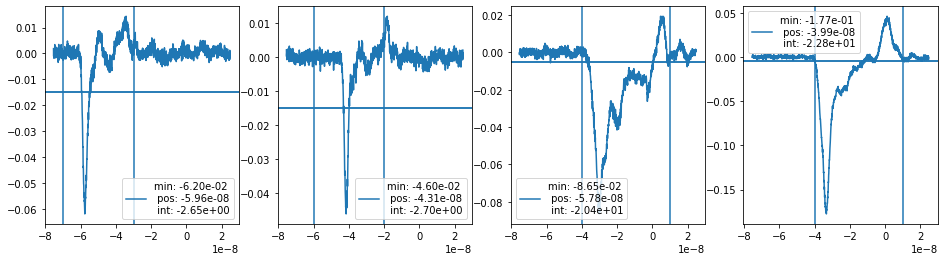

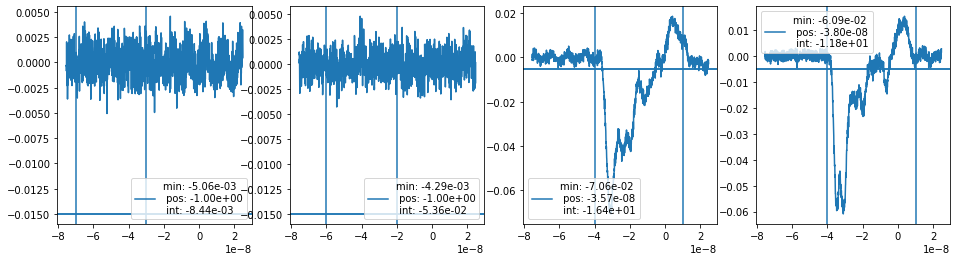

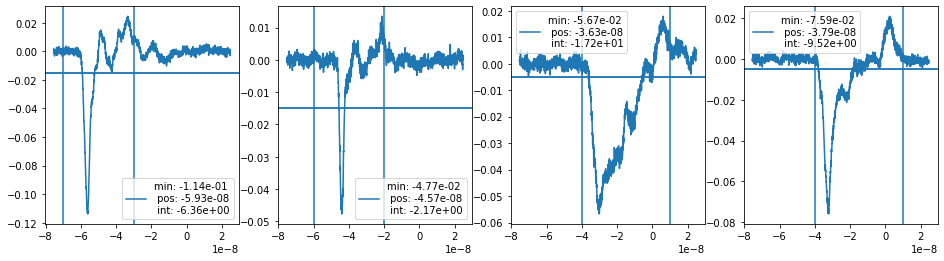

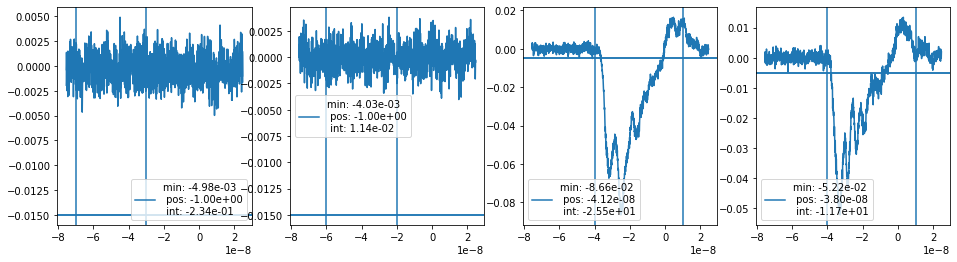

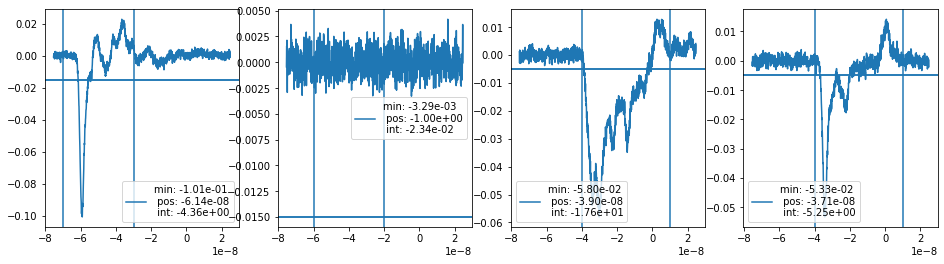

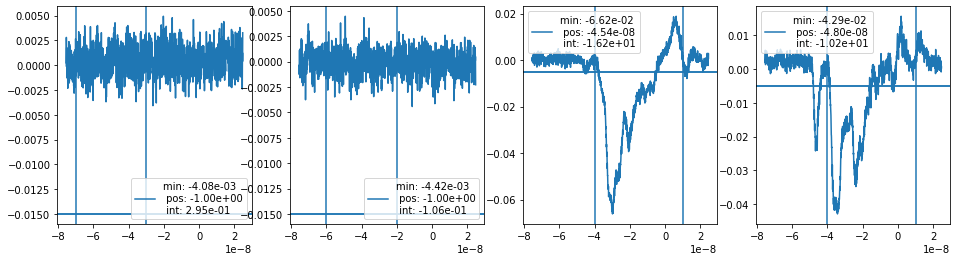

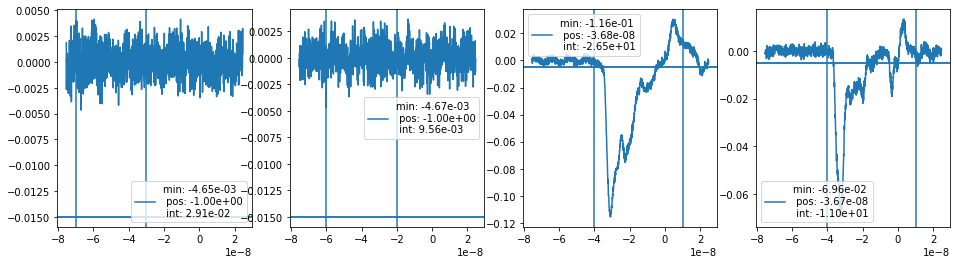

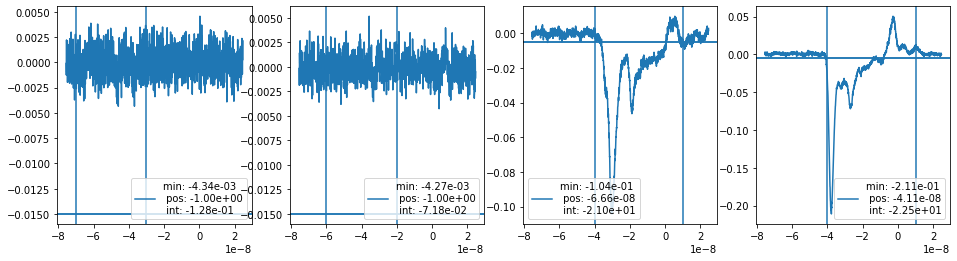

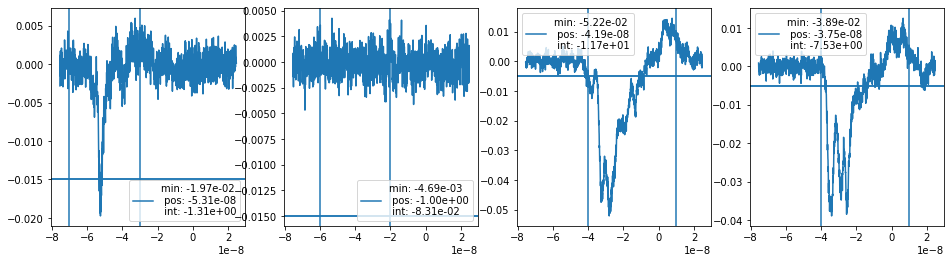

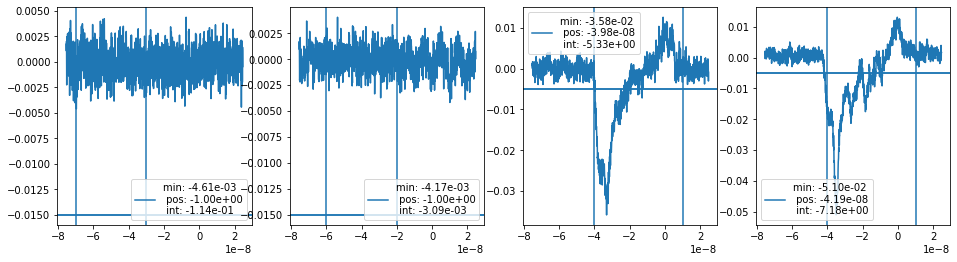

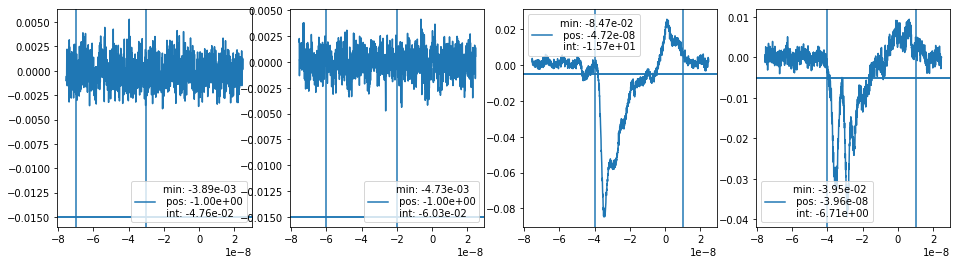

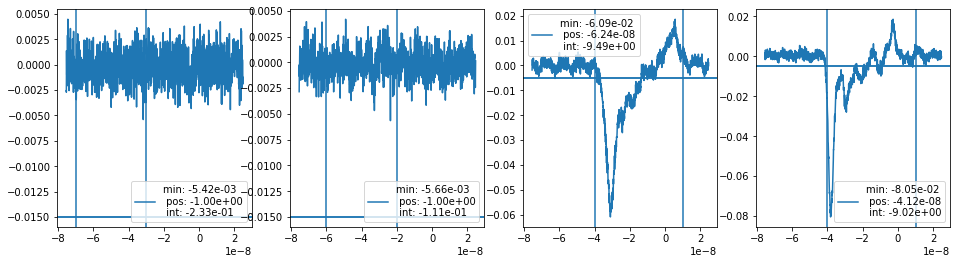

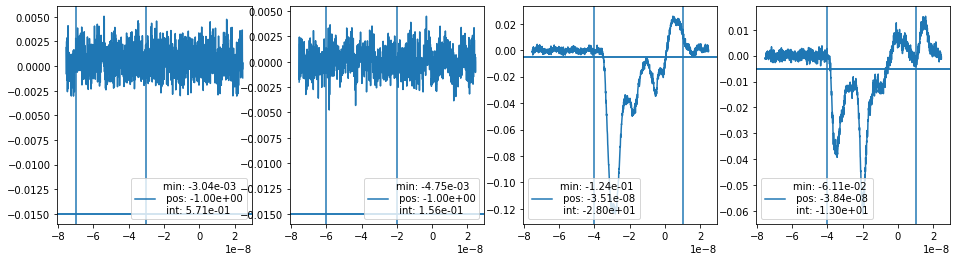

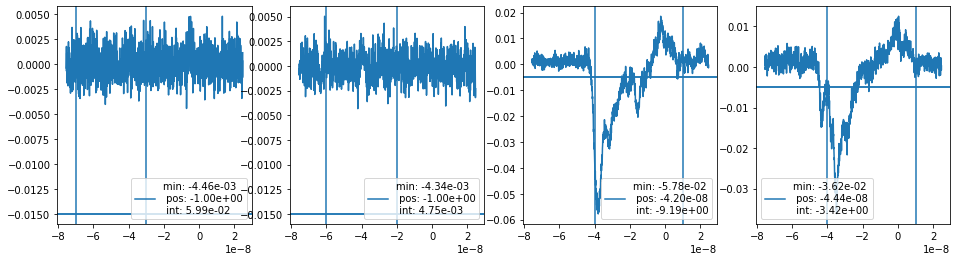

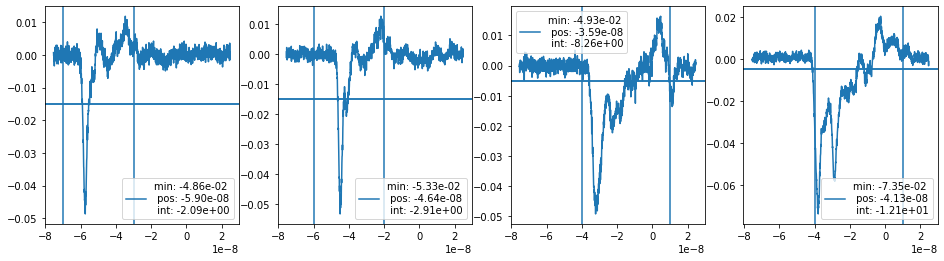

In [24]:
from scipy import signal
usamle = 100
# last = True
# if last:
#     file=C1
# else:
#     file='C1--WC--middle--flter--00005.trc'
# data = lecroyparser.ScopeData(path+file)
# plt.plot(data.x, data.y)
# data_rs = signal.resample(data.y, usamle, data.x)
# plt.plot(data_rs[1], data_rs[0])
# plt.ylim(-0.030, 0.010)
# #plt.xlim(-8e-8, -5e-8)
# plt.show()

def wave_s(path, filename, usamle, verbose=False):
    import numpy as np

    if verbose: 
        print(filename)
        
    f = open(path+filename, 'rb')
    if usamle:
        data = lecroyparser.ScopeData(data = f.read(), sparse = usamle)
    else:
        data = lecroyparser.ScopeData(data = f.read())
    plt.plot(data.x, data.y)

    if verbose: 
        print (data)
        print(data.verticalGain, data.timeBase, data.horizOffset, data.verticalOffset)
    f.close()
    plt.show()
    print(" int: {:.2e}, min: {:.3f}, mean out of time: {:.3f}".format(np.trapz(data.x, data.y),  
                                                        np.min(data.y), 
                                                        np.mean(data.y[data.x<-0.7e-7])))
path='/jupyter-workspace/cloud-storage/cygno-data/WC/'
i=19
verbose = False
import time
for i, nfile in enumerate(C1):
    fig, ax = plt.subplots(1,4, figsize=(16, 4))
    # wave_s(path, filename=C1[i], usamle = 0, verbose=verbose)
    # wave_s(path, filename=C2[i], usamle = 0, verbose=verbose)
    # wave_s(path, filename=C3[i], usamle = 0, verbose=verbose)
    # wave_s(path, filename=C4[i], usamle = 0, verbose=verbose)
    
    wave(path, [C1[i]], usamle=0, th = -0.015, x_cut_min = -7e-8, x_cut_max = -3e-8, ax=ax[0], verbose=verbose)
    wave(path, [C2[i]], usamle=0, th = -0.015, x_cut_min = -6e-8, x_cut_max = -2e-8, ax=ax[1], verbose=verbose)
    wave(path, [C3[i]], usamle=0, th = -0.005, x_cut_min = -4e-8, x_cut_max = 1e-8, ax=ax[2], verbose=verbose)
    wave(path, [C4[i]], usamle=0, th = -0.005, x_cut_min = -4e-8, x_cut_max = 1e-8, ax=ax[3], verbose=verbose)
#    time.sleep(2)
    plt.show()
    if i == 30:
        break

In [74]:
under_th[0], min_w[0], int_w[0], min_pos_w[0]

('C4--center--V2buio--00030.trc', -0.0037678266, -0.1698972, -1)

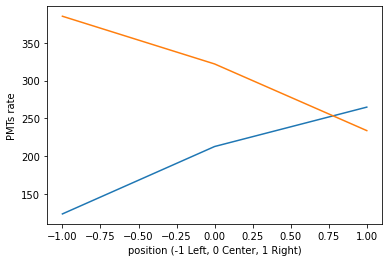

In [11]:
ne = np.array([[124,385],
     [213,322],
     [265,234]])
plt.plot([-1,0,1], ne[:,0])
plt.plot([-1,0,1], ne[:,1])
plt.ylabel("PMTs rate")
plt.xlabel("position (-1 Left, 0 Center, 1 Right)")
plt.show()

In [91]:
# store = pd.HDFStore('site1_CFD.h5')
# dr = store["df"]

In [27]:
# siamo al centro
# file 610 cambiata soglia C2 a 1900
# 672 HV 1850
# 725 cambiata scala oscilloscopio al centro
# 1080 spostato su C2
# 1430 ci spostiemo su C1
# 2170 rimettiamo al 
# in mezzo butta
# 2337 vicino C2
#files_all = [f for f in files_all if (int(f[8:13]) > 1080 and int(f[8:13]) < 1420) ]
# files_all = [f for f in files_all if (int(f[8:13]) > 725 and int(f[8:13]) < 1070) ]
#files_all = [f for f in files_all if (int(f[8:13]) > 1430 and int(f[8:13]) < 2160) ]
#files_all = [f for f in files_all if (int(f[8:13]) > 2340) ]
# usamle = 100 # -1 read all https://pypi.org/project/lecroyparser/
# files = [f for f in files_all if 'C3' in f]
# under_th_C3 = wave(path, files, usamle, th = th)
# print ("C0", len(under_th_C3))
# files = [f for f in files_all if 'C1' in f]
# under_th_C1 =wave(path, files, usamle, th = th)
# print ("C1", len(under_th_C1))
# files = [f for f in files_all if 'C2' in f]
# under_th_C2 =wave(path, files, usamle, th = th)
# print ("C2", len(under_th_C2))

In [285]:
# def wave_s_d(path, fC1, fC2, verbose=False):
#     import numpy as np
#     x_cut_min = -0.85e-7
#     x_cut_max = -0.50e-7
#     t_C1 = []
#     t_C2 = []
#     f = open(path+fC1, 'rb')
#     data_C1 = lecroyparser.ScopeData(data = f.read(), sparse = usamle)
#     f = open(path+fC2, 'rb')
#     data_C2 = lecroyparser.ScopeData(data = f.read(), sparse = usamle)

#     plt.plot(data_C1.x, data_C1.y, label="C1")
#     plt.plot(data_C1.x, data_C2.y, label="C2")
#     plt.axvline(x_cut_min)
#     plt.axvline(x_cut_max)

#     f.close()
#     plt.legend()
#     plt.ylim(-0.45, 0.05)
#     plt.xlim(-1e-7, 0)
#     plt.show()
#     t0_C1 = data_C1.x[np.where(data_C1.y == data_C1.y.min())][0]
#     t0_C2 = data_C2.x[np.where(data_C2.y == data_C2.y.min())][0]
#     x0_C1 = np.min(data_C1.y[data_C1.x<x_cut_min])
#     x0_C2 = np.min(data_C2.y[data_C2.x>x_cut_min])
#     i0_C1 = np.trapz(data_C1.y[data_C1.x<x_cut_min])
#     i0_C2 = np.trapz(data_C2.y[data_C2.x>x_cut_min])

#     print(" int: {:.2e}, min: {:.3f}, mean out of time: {:.2e} {}".format(np.trapz(data_C1.x[data_C1.x>x_cut_min], 
#                                                                                 data_C1.y[data_C1.x>x_cut_min]),  
#                                                          np.min(data_C1.y[data_C1.x>x_cut_min]), 
#                                                          np.mean(data_C1.y[data_C1.x<x_cut_min]), t0_C1))
#     print(" int: {:.2e}, min: {:.3f}, mean out of time: {:.2e} {}".format(np.trapz(data_C2.x[data_C2.x>x_cut_min], 
#                                                                                 data_C2.y[data_C2.x>x_cut_min]),  
#                                                          np.min(data_C2.y[data_C2.x>x_cut_min]), 
#                                                          np.mean(data_C2.y[data_C2.x<x_cut_min]), t0_C2))
#     return t0_C1, t0_C2, x0_C1, x0_C2, i0_C1, i0_C2
# i = 21
# t_C1 = []
# t_C2 = []
# x_C1 = []
# x_C2 = []
# i_C1 = []
# i_C2 = []
# for i in range(np.min([len(under_th_C2), len(under_th_C1)])):
#     t0_C1, t0_C2, x0_C1, x0_C2, i0_C1, i0_C2 = wave_s_d(path, under_th_C1[i], under_th_C2[i], verbose=True)
#     t_C1.append(t0_C1)
#     t_C2.append(t0_C2)
#     x_C1.append(x0_C1)
#     x_C2.append(x0_C2)
#     i_C1.append(i0_C1)
#     i_C2.append(i0_C2)
